In [1]:
import pandas as pd
import nibabel as nib
import glob
import os
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

In [2]:
def load_nib_file(path):
    mask = nib.load(path)
    mask_data = mask.get_fdata()

    return mask, mask_data

def compute_dice_score(agg, gt):
    dice = 1 - spatial.distance.dice(agg.flatten(), gt.flatten())
    return dice

In [3]:
path_data_baseline_test_nnUNet_T1_Sub = "/mnt/data/psteinmetz/neotex/nnUNet/nnUNet_predictions/Dataset002_T1_Sub/30_baseline/postprocessing/"
path_data_baseline_test_nnUNet_T1 = "/mnt/data/psteinmetz/neotex/nnUNet/nnUNet_predictions/Dataset001_T1/30_baseline/postprocessing/"
path_data_GT = "/mnt/data/psteinmetz/neotex/data_MRI/baseline_data/Testing/"

excel_file_path = "/mnt/data/mdroguet/Testing/Runs/results_Training_test_30_donnees_2.xlsx"

In [4]:
list_GT = glob.glob(path_data_GT + '*/GT_RS_CR_2mm.nii.gz')
list_nnUNet_T1 = glob.glob(path_data_baseline_test_nnUNet_T1 + '*.nii.gz')
list_nnUNet_T1_Sub = glob.glob(path_data_baseline_test_nnUNet_T1_Sub + '*.nii.gz')

In [5]:
GT = {}
for i in list_GT:
    mask_GT, mask_data_GT = load_nib_file(i)
    GT.update({i.split('/')[-2]: mask_data_GT})

In [6]:
nnUNet_T1 = {}
for i in list_nnUNet_T1:
    mask_nnUNet_T1, mask_data_nnUNet_T1 = load_nib_file(i)
    file_id = i.split('/')[-1][7:10]
    if file_id[:2] == '00':
        case_id = 'case_' + file_id[-1]
    else:
        case_id = 'case_' + file_id[-2:]
    
    nnUNet_T1.update({case_id: mask_data_nnUNet_T1})

In [7]:
nnUNet_T1_Sub = {}
for i in list_nnUNet_T1_Sub:
    mask_nnUNet_T1_Sub, mask_data_nnUNet_T1_Sub = load_nib_file(i)
    file_id = i.split('/')[-1][7:10]
    if file_id[:2] == '00':
        case_id = 'case_' + file_id[-1]
    else:
        case_id = 'case_' + file_id[-2:]
    
    nnUNet_T1_Sub.update({case_id: mask_data_nnUNet_T1_Sub})

In [8]:
dice_results_T1 = {}
for i in nnUNet_T1_Sub.keys():
    score_T1 = compute_dice_score(nnUNet_T1[i], GT[i])
    dice_results_T1.update({i: score_T1})

In [9]:
dice_results_T1_Sub = {}
for i in nnUNet_T1_Sub.keys():
    score_T1_Sub = compute_dice_score(nnUNet_T1_Sub[i], GT[i])
    dice_results_T1_Sub.update({i: score_T1_Sub})

In [10]:
dice_scores_baseline_data_test_T1 = pd.DataFrame.from_dict(dice_results_T1, orient='index')
dice_scores_baseline_data_test_T1.rename(columns={0: "nnUNet_T1"}, inplace=True)
dice_scores_baseline_data_test_T1_Sub = pd.DataFrame.from_dict(dice_results_T1_Sub, orient='index')
dice_scores_baseline_data_test_T1_Sub.rename(columns={0: "nnUNet_T1_Sub"}, inplace=True)

In [11]:
results_leuven = pd.read_excel(excel_file_path)
results_leuven_T1_Sub = results_leuven[['case', 'T1+Sub5_Training']].dropna().set_index('case')
results_leuven_T1= results_leuven[['case', 'T1_Training']].dropna().set_index('case')

In [12]:
results_nnUNet = pd.concat([dice_scores_baseline_data_test_T1, dice_scores_baseline_data_test_T1_Sub], axis=1)

In [13]:
resume_T1_Sub = pd.concat([results_leuven_T1_Sub, dice_scores_baseline_data_test_T1_Sub], axis=1).dropna()
resume_T1 = pd.concat([results_leuven_T1, dice_scores_baseline_data_test_T1], axis=1).dropna()

glob = pd.concat([resume_T1, resume_T1_Sub], axis=1)

In [14]:
glob

,T1_Training,nnUNet_T1,T1+Sub5_Training,nnUNet_T1_Sub
case_3,0.745599,0.785377,0.632346,0.824764
case_4,0.432368,0.000000,0,0.000000
case_8,0.751546,0.793814,0.729532,0.787484
case_10,0.825222,0.858549,0.794153,0.854392
case_11,0.698338,0.678383,0.741715,0.747995
case_17,0.869680,0.775404,0.829421,0.768162
case_18,0.852054,0.801443,0.833806,0.826081
case_19,0.811074,0.803412,0.844156,0.818732
case_20,0.015900,0.000000,0.880622,0.757264
case_23,0.532320,0.741890,0.724966,0.798859


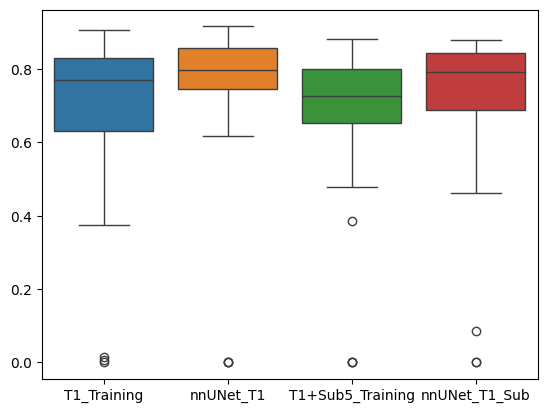

In [15]:
fig = plt.figure()
sns.boxplot(data=glob)
plt.show()

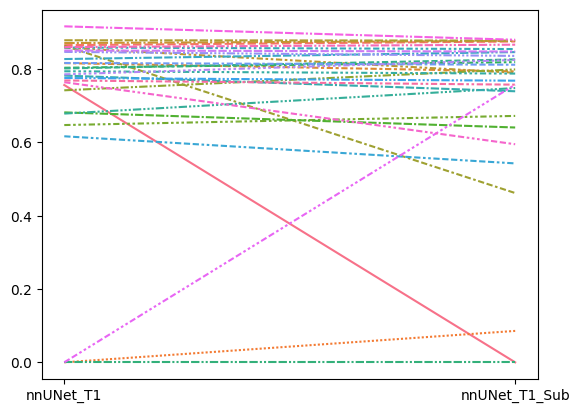

In [16]:
fig = plt.figure()
sns.lineplot(data=results_nnUNet.T, legend=False)
plt.show()